x shape: (703532,), y shape: (703532,), t shape: (703532,), p shape: (703532,)


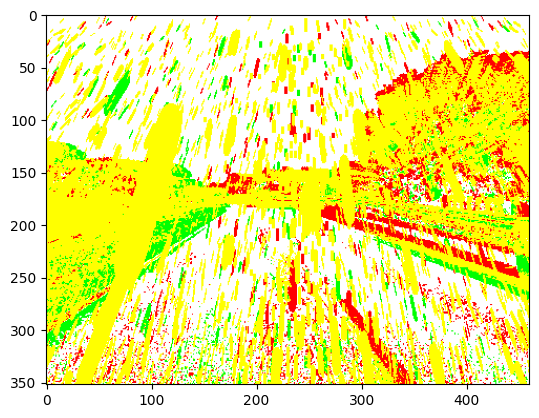

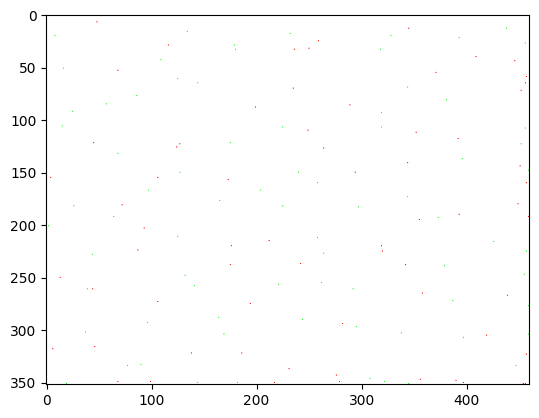

In [47]:
import numpy as np
import glob
import matplotlib.pyplot as plt

# 获取目录下的所有 .npz 文件
file_paths = sorted(glob.glob("/home/soft/code/MambaMOS/data/sythetic/SYTHETIC_DATA_DIR/sythetic/merge_data/50mm/*.npz"))

# 只选择前 8 个文件
file_paths = file_paths[:8]

# 初始化空列表来存储所有文件的数据
all_x, all_y, all_t, all_p = [], [], [], []

# 读取每个 .npz 文件并提取数据
for file_path in file_paths:
    data = np.load(file_path)
    all_x.append(data['x'])
    all_y.append(data['y'])
    all_t.append(data['t'])
    all_p.append(data['p'])

# 将所有文件的数据合并在一起
x = np.concatenate(all_x)
y = np.concatenate(all_y)
t = np.concatenate(all_t)
p = np.concatenate(all_p)

# 打印数据的形状
print(f"x shape: {x.shape}, y shape: {y.shape}, t shape: {t.shape}, p shape: {p.shape}")

# 定义渲染函数
def render(x, y, t, p, shape):
    # 将极性从 {1, -1} 映射到 {0, 1}，以适应图像渲染
    p = (p > 0).astype(int)
    img = np.full(shape=shape + [3], fill_value=255, dtype="uint8")
    img[y, x, :] = 0
    img[y, x, p] = 255
    return img

# 设置图像形状
shape = [352, 460]

# 使用渲染函数生成图像
img0 = render(x=x, y=y, t=t, p=p, shape=shape)

# 显示图像
handle = plt.imshow(img0)
plt.show(block=False)
plt.pause(0.002)

# 假设网格大小
grid_size = 0.09

x0 = x/460
y0 = y/352

# 将坐标归一化到网格大小
scaled_coord = np.vstack((x0, y0)).T / np.array(grid_size)

# 网格化坐标
grid_coord = np.floor(scaled_coord).astype(int)

# 计算最小坐标
min_coord = grid_coord.min(0)
grid_coord -= min_coord
scaled_coord -= min_coord
min_coord = min_coord * np.array(grid_size)

def fnv_hash_vec(arr):
    """
    FNV64-1A
    """
    assert arr.ndim == 2
    # Floor first for negative coordinates
    arr = arr.copy()
    arr = arr.astype(np.uint64, copy=False)
    hashed_arr = np.uint64(14695981039346656037) * np.ones(
        arr.shape[0], dtype=np.uint64
    )
    for j in range(arr.shape[1]):
        hashed_arr *= np.uint64(1099511628211)
        hashed_arr = np.bitwise_xor(hashed_arr, arr[:, j])
    return hashed_arr

# 为网格坐标生成唯一哈希值
def hash_coordinates(coords):
    return coords[:, 0] * 31 + coords[:, 1] * 37  # 简单的哈希函数，假设坐标是二维的

key = fnv_hash_vec(grid_coord)

# 排序坐标并计算去重后的索引
idx_sort = np.argsort(key)
key_sort = key[idx_sort]
_, inverse, count = np.unique(key_sort, return_inverse=True, return_counts=True)

# 计算每个网格内的采样点
a = np.cumsum(np.insert(count, 0, 0)[0:-1])
b = np.random.randint(0, count.max(), count.size)
idx_select = (a + b % count)
idx_unique = idx_sort[idx_select]


x1 = (x0[idx_unique]*460).astype(int)
y1 = (y0[idx_unique]*352).astype(int)
# 获取采样后的坐标和时间戳
coordinates_sampled = np.vstack((x1, y1)).T
time_sampled = t[idx_unique]
polarity = p[idx_unique]

# 显示采样后的图像
img = render(x=coordinates_sampled[:, 0], y=coordinates_sampled[:, 1], t=time_sampled, p=polarity, shape=shape)
handle = plt.imshow(img)
plt.show(block=False)
plt.pause(0.002)

In [3]:
x.shape

(703532,)

In [4]:
x1.shape

(144,)

x shape: (703532,), y shape: (703532,), t shape: (703532,), p shape: (703532,)


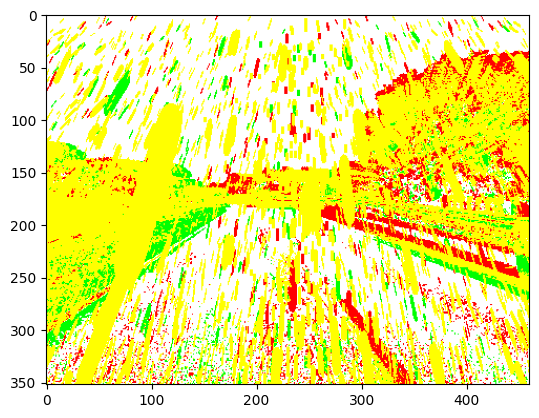

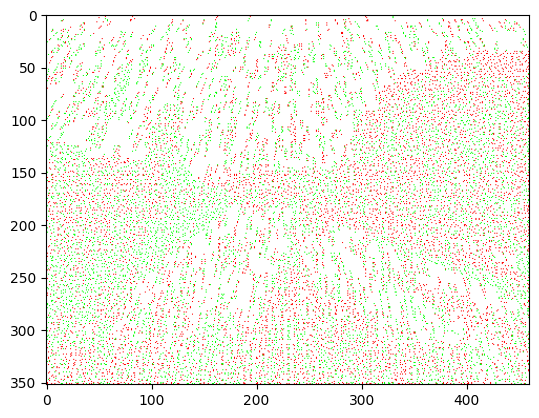

In [5]:
import numpy as np
import glob
import matplotlib.pyplot as plt

# 获取目录下的所有 .npz 文件
file_paths = sorted(glob.glob("/home/soft/code/MambaMOS/data/sythetic/SYTHETIC_DATA_DIR/sythetic/merge_data/50mm/*.npz"))

# 只选择前 8 个文件
file_paths = file_paths[:8]

# 初始化空列表来存储所有文件的数据
all_x, all_y, all_t, all_p = [], [], [], []

# 读取每个 .npz 文件并提取数据
for file_path in file_paths:
    data = np.load(file_path)
    all_x.append(data['x'])
    all_y.append(data['y'])
    all_t.append(data['t'])
    all_p.append(data['p'])

# 将所有文件的数据合并在一起
x = np.concatenate(all_x)
y = np.concatenate(all_y)
t = np.concatenate(all_t)
p = np.concatenate(all_p)

# 打印数据的形状
print(f"x shape: {x.shape}, y shape: {y.shape}, t shape: {t.shape}, p shape: {p.shape}")

# 定义渲染函数
def render(x, y, t, p, shape):
    # 将极性从 {1, -1} 映射到 {0, 1}，以适应图像渲染
    p = (p > 0).astype(int)
    img = np.full(shape=shape + [3], fill_value=255, dtype="uint8")
    img[y, x, :] = 0
    img[y, x, p] = 255
    return img

# 设置图像形状
shape = [352, 460]

# 使用渲染函数生成图像
img0 = render(x=x, y=y, t=t, p=p, shape=shape)

# 显示图像
handle = plt.imshow(img0)
plt.show(block=False)
plt.pause(0.002)

# 假设网格大小
grid_size = 3

x0 = x
y0 = y

# 将坐标归一化到网格大小
scaled_coord = np.vstack((x0, y0)).T / np.array(grid_size)

# 网格化坐标
grid_coord = np.floor(scaled_coord).astype(int)

# 计算最小坐标
min_coord = grid_coord.min(0)
grid_coord -= min_coord
scaled_coord -= min_coord
min_coord = min_coord * np.array(grid_size)

def fnv_hash_vec(arr):
    """
    FNV64-1A
    """
    assert arr.ndim == 2
    # Floor first for negative coordinates
    arr = arr.copy()
    arr = arr.astype(np.uint64, copy=False)
    hashed_arr = np.uint64(14695981039346656037) * np.ones(
        arr.shape[0], dtype=np.uint64
    )
    for j in range(arr.shape[1]):
        hashed_arr *= np.uint64(1099511628211)
        hashed_arr = np.bitwise_xor(hashed_arr, arr[:, j])
    return hashed_arr

# 为网格坐标生成唯一哈希值
def hash_coordinates(coords):
    return coords[:, 0] * 31 + coords[:, 1] * 37  # 简单的哈希函数，假设坐标是二维的

key = fnv_hash_vec(grid_coord)

# 排序坐标并计算去重后的索引
idx_sort = np.argsort(key)
key_sort = key[idx_sort]
_, inverse, count = np.unique(key_sort, return_inverse=True, return_counts=True)

# 计算每个网格内的采样点
a = np.cumsum(np.insert(count, 0, 0)[0:-1])
b = np.random.randint(0, count.max(), count.size)
idx_select = (a + b % count)
idx_unique = idx_sort[idx_select]


x1 = (x0[idx_unique]).astype(int)
y1 = (y0[idx_unique]).astype(int)
# 获取采样后的坐标和时间戳
coordinates_sampled = np.vstack((x1, y1)).T
time_sampled = t[idx_unique]
polarity = p[idx_unique]

# 显示采样后的图像
img = render(x=coordinates_sampled[:, 0], y=coordinates_sampled[:, 1], t=time_sampled, p=polarity, shape=shape)
handle = plt.imshow(img)
plt.show(block=False)
plt.pause(0.002)

In [6]:
x.shape

(703532,)

In [7]:

x1.shape

(14129,)

In [55]:
import numpy as np
import glob
import matplotlib.pyplot as plt

# 获取目录下的所有 .npz 文件
file_paths = sorted(glob.glob("/home/soft/code/MambaMOS/data/sythetic/SYTHETIC_DATA_DIR/sythetic/merge_data/100mm/*.npz"))

file_paths2 = sorted(glob.glob("/home/soft/code/MambaMOS/data/sythetic/SYTHETIC_DATA_DIR/sythetic/raw_data/*.npz"))

# 只选择前 8 个文件
# file_paths = file_paths[:8]

# # 初始化空列表来存储所有文件的数据
# all_x, all_y, all_t, all_p = [], [], [], []

# # 读取每个 .npz 文件并提取数据
# for file_path in file_paths:
#     data = np.load(file_path)
#     all_x.append(data['x'])
#     all_y.append(data['y'])
#     all_t.append(data['t'])
#     all_p.append(data['p'])

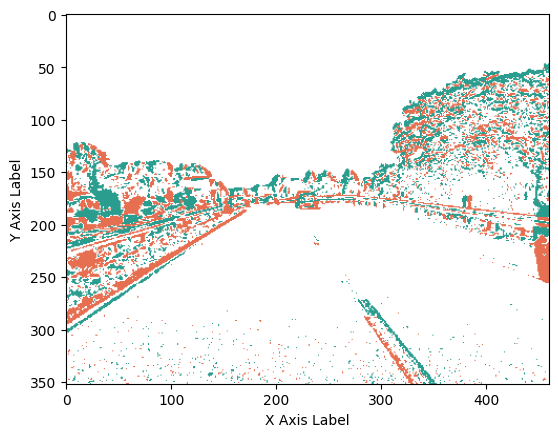

In [57]:
events = np.load(file_paths2[0])
x = events['x']
y = events['y']
t = events['t']
p = events['p']
def render(x, y, t, p, shape):
    # 创建一个空白图像
    img = np.full(shape=shape + [3], fill_value=255, dtype="uint8")

    # 定义颜色
    color_positive = [231, 111, 81]  # #E76F51
    color_negative = [42, 157, 143]  # #2A9D8F

    # 根据 p 的值设置颜色
    for i in range(len(p)):
        if p[i] > 0:
            img[y[i], x[i]] = color_positive  # 使用指定的颜色
        else:
            img[y[i], x[i]] = color_negative  # 使用指定的颜色

    return img

# 设置图像形状
shape = [352, 460]

# 使用渲染函数生成图像
img0 = render(x=x, y=y, t=t, p=p, shape=shape)

# 显示图像
handle = plt.imshow(img0)
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.show(block=False)
plt.pause(0.002)


In [10]:
p.max()

1

In [11]:
p.min()

-1

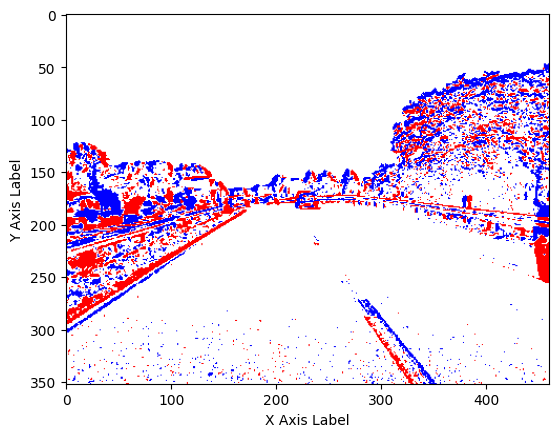

In [12]:
events2 = np.load(file_paths2[0])
x2 = events2['x']
y2 = events2['y']
t2 = events2['t']
p2 = events2['p']
def render(x, y, t, p, shape):
    # 创建一个空白图像
    img = np.full(shape=shape + [3], fill_value=255, dtype="uint8")

    # 定义颜色
    # color_positive = [231, 111, 81]  # #E76F51
    # color_negative = [42, 157, 143]  # #2A9D8F
    color_positive = [255, 0, 0]  # #E76F51
    color_negative = [0, 0, 255]  # #2A9D8F

    # 根据 p 的值设置颜色
    for i in range(len(p)):
        if p[i] > 0:
            img[y[i], x[i]] = color_positive  # 使用指定的颜色
        else:
            img[y[i], x[i]] = color_negative  # 使用指定的颜色

    return img

# 设置图像形状
shape = [352, 460]

# 使用渲染函数生成图像
img0 = render(x=x2, y=y2, t=t2, p=p2, shape=shape)

# 显示图像
handle = plt.imshow(img0)
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.show(block=False)
plt.pause(0.002)


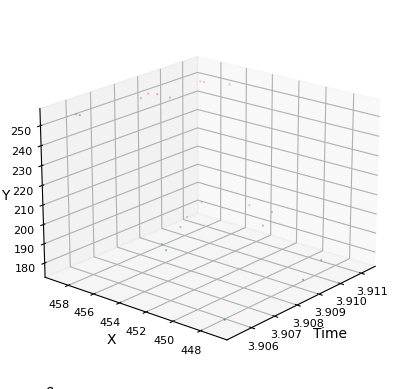

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 假设 x, y, t, p 是已经加载的点云数据
# 例如：
# x = np.array([...])
# y = np.array([...])
# t = np.array([...])
# p = np.array([...])

# 创建一个新的图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 根据 p 的值设置颜色
colors = np.where(p > 0, '#E76F51', '#2A9D8F')

# 绘制三维点云图，调整点的大小
sc = ax.scatter(t[:20], x, y, c=colors, marker='.', s=1)  # s 参数调整点的大小

# 设置轴标签
ax.set_xlabel('Time', labelpad=-2)
ax.set_ylabel('X', labelpad=-3)
# ax.set_zlabel('Y',fontsize=12)
ax.set_zlabel('Y',labelpad=-6)
# plt.legend(loc='upper left') 

ax.tick_params(axis='x', which='major', pad=0, labelsize=8)
ax.tick_params(axis='y', which='major', pad=0, labelsize=8)
ax.tick_params(axis='z', which='major', pad=-5, labelsize=8)

ax.zaxis.set_tick_params(pad=0)
ax.xaxis.set_tick_params(pad=0)
ax.yaxis.set_tick_params(pad=0)

ax.view_init(elev=20, azim=220)

# 显示图形
plt.show()

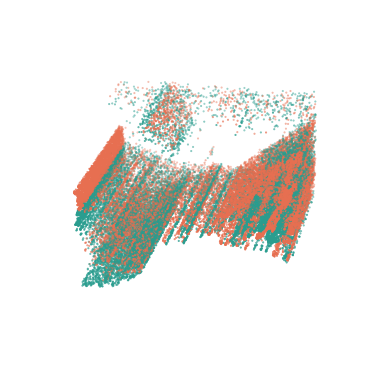

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# 创建一个新的图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 根据 p 的值设置颜色
colors = np.where(p2 > 0, '#E76F51', '#2A9D8F')

# 绘制三维点云图，调整点的大小
sc = ax.scatter(t2, x2, y2, c=colors, marker='.', s=1)  # s 参数调整点的大小

# 设置轴标签
ax.set_xlabel('Time', labelpad=-2)
ax.set_ylabel('X', labelpad=-3)
# ax.set_zlabel('Y',fontsize=12)
ax.set_zlabel('Y',labelpad=-6)
# plt.legend(loc='upper left') 

ax.tick_params(axis='x', which='major', pad=0, labelsize=8)
ax.tick_params(axis='y', which='major', pad=0, labelsize=8)
ax.tick_params(axis='z', which='major', pad=-5, labelsize=8)

ax.zaxis.set_tick_params(pad=0)
ax.xaxis.set_tick_params(pad=0)
ax.yaxis.set_tick_params(pad=0)
ax.set_axis_off()
ax.view_init(elev=20, azim=190)
# fig.set_size_inches(8, 6, forward=True) 

# 显示图形
plt.show()

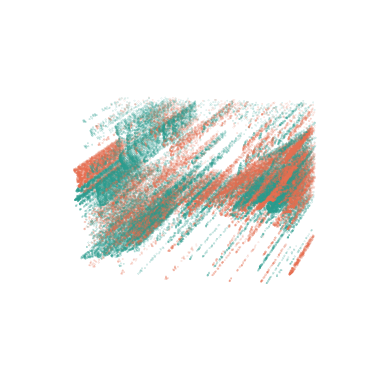

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# 创建一个新的图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 根据 p 的值设置颜色
colors = np.where(p > 0, '#E76F51', '#2A9D8F')

# 绘制三维点云图，调整点的大小
sc = ax.scatter(t, x, y, c=colors, marker='.', s=0.1)  # s 参数调整点的大小

# 设置轴标签
ax.set_xlabel('Time', labelpad=-2)
ax.set_ylabel('X', labelpad=-3)
# ax.set_zlabel('Y',fontsize=12)
ax.set_zlabel('Y',labelpad=-6)
# plt.legend(loc='upper left') 

ax.tick_params(axis='x', which='major', pad=0, labelsize=8)
ax.tick_params(axis='y', which='major', pad=0, labelsize=8)
ax.tick_params(axis='z', which='major', pad=-5, labelsize=8)

ax.zaxis.set_tick_params(pad=0)
ax.xaxis.set_tick_params(pad=0)
ax.yaxis.set_tick_params(pad=0)
ax.set_axis_off()
ax.view_init(elev=10, azim=190)
# fig.set_size_inches(8, 6, forward=True) 

# 显示图形
plt.show()

In [101]:
import matplotlib
print(matplotlib.__version__)

3.7.5


In [52]:
points = set(zip(x, y, t, p))
points_to_remove = set(zip(x2, y2, t2, p2))

# 从 points 中去掉 points_to_remove 中的点对
filtered_points = points - points_to_remove

# 将过滤后的点对拆分回 x, y, t, p
x_filtered, y_filtered, t_filtered, p_filtered = zip(*filtered_points)

# 转换回 numpy 数组
x_filtered = np.array(x_filtered)
y_filtered = np.array(y_filtered)
t_filtered = np.array(t_filtered)
p_filtered = np.array(p_filtered)


In [54]:
len(points)

97657

In [55]:
len(filtered_points)

48580

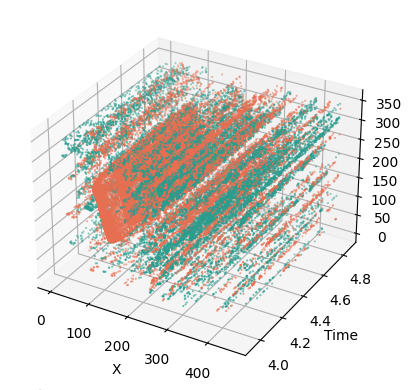

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 根据 p 的值设置颜色
colors = np.where(p_filtered > 0, '#E76F51', '#2A9D8F')

# 绘制三维点云图，调整点的大小
sc = ax.scatter(x_filtered, t_filtered, y_filtered, c=colors, marker='.', s=1)  # s 参数调整点的大小

# 设置轴标签
ax.set_xlabel('X')
ax.set_ylabel('Time')
ax.set_zlabel('Y')

# 显示图形
plt.show()

In [102]:
import torch
from pytorch3d.ops import knn_points

class CurvatureLoss:
    def __init__(self, k=16):
        """
        Initialize curvature loss class.
        
        Args:
            k (int): Number of neighbors for KNN search.
        """
        self.k = k

    def compute_normals(self, point_cloud):
        """
        Compute surface normals using local PCA.
        
        Args:
            point_cloud (torch.Tensor): Input point cloud, shape [N, 4]
        
        Returns:
            torch.Tensor: Surface normals, shape [N, 3]
        """
        pc_xyz = point_cloud[:, :3]  # Extract first three dimensions (x, y, z)
        N = pc_xyz.size(0)

        # Compute KNN
        knn = knn_points(pc_xyz.unsqueeze(0), pc_xyz.unsqueeze(0), K=self.k + 1)
        neighbor_idx = knn.idx.squeeze(0)[:, 1:]  # Remove self, keep k neighbors [N, k]

        # Get neighborhood points
        neighbors = pc_xyz[neighbor_idx]  # [N, k, 3]
        centers = pc_xyz.unsqueeze(1)  # [N, 1, 3]
        diffs = neighbors - centers  # [N, k, 3]

        # Compute covariance matrix
        covariance = torch.einsum('nik,njk->nij', diffs, diffs)  # [N, 3, 3]

        # Eigenvalue decomposition
        eigenvalues, eigenvectors = torch.linalg.eigh(covariance)  # [N, 3], [N, 3, 3]

        # Normal vector corresponds to the eigenvector of the smallest eigenvalue
        normals = eigenvectors[:, :, 0]  # [N, 3]
        
        # Ensure normal direction is consistent
        normals = torch.where(
            (normals * eigenvectors[:, :, -1] < 0).all(dim=1, keepdim=True),
            -normals, 
            normals
        )
        
        return normals

    def compute_kappa(self, point_cloud, normals, k=None):
        """
        Compute curvature (kappa).
        
        Args:
            point_cloud (torch.Tensor): Input point cloud, shape [N, 4]
            normals (torch.Tensor): Surface normals, shape [N, 3]
            k (int, optional): Number of neighbors for KNN search
        
        Returns:
            torch.Tensor: Curvature values, shape [N]
        """
        if k is None:
            k = self.k

        pc_xyz = point_cloud[:, :3]  # Extract first three dimensions
        N = pc_xyz.size(0)

        # Compute KNN
        knn = knn_points(pc_xyz.unsqueeze(0), pc_xyz.unsqueeze(0), K=k + 1)
        neighbor_idx = knn.idx.squeeze(0)[:, 1:]  # Remove self [N, k]

        # Get neighborhood points
        neighbors = pc_xyz[neighbor_idx]  # [N, k, 3]
        centers = pc_xyz.unsqueeze(1)  # [N, 1, 3]
        diffs = neighbors - centers  # [N, k, 3]

        # Normalize offset vectors
        diffs = diffs / (torch.norm(diffs, dim=-1, keepdim=True) + 1e-6)  # [N, k, 3]

        # Compute curvature
        kappa = torch.abs(torch.einsum('nik,ni->nk', diffs, normals).mean(dim=1))  # [N]
        return kappa

    def __call__(self, adv_pc, ori_pc):
        """
        Compute curvature loss.
        
        Args:
            adv_pc (torch.Tensor): Adversarial point cloud, shape [N, 4]
            ori_pc (torch.Tensor): Original point cloud, shape [M, 4]
        
        Returns:
            torch.Tensor: Scalar curvature loss
        """
        # Compute normals and curvature for original point cloud
        ori_normals = self.compute_normals(ori_pc)
        ori_kappa = self.compute_kappa(ori_pc, ori_normals)

        # Match each adversarial point to the closest point in the original point cloud
        knn = knn_points(adv_pc[:, :3].unsqueeze(0), ori_pc[:, :3].unsqueeze(0), K=1)
        closest_idx = knn.idx.squeeze(0).squeeze(-1)  # Closest point indices [N]

        # Get corresponding normals from original point cloud
        matched_normals = ori_normals[closest_idx]  # [N, 3]

        # Compute curvature for adversarial point cloud using matched normals
        adv_kappa = self.compute_kappa(adv_pc, matched_normals, k=self.k)

        # Get corresponding original curvature values
        closest_ori_kappa = ori_kappa[closest_idx]  # [N]

        # Compute loss
        loss = ((adv_kappa - closest_ori_kappa) ** 2).mean()
        return loss

# Example usage
def main():
    # Set random seed for reproducibility
    torch.manual_seed(42)

    # Simulate point clouds
    N, M = 1024, 2048
    adv_pc = torch.rand(N, 4)  # Adversarial point cloud
    ori_pc = torch.rand(M, 4)  # Original point cloud

    # Initialize curvature loss function
    curv_loss_fn = CurvatureLoss(k=16)

    # Compute curvature loss
    loss = curv_loss_fn(adv_pc, ori_pc)
    print("Curvature Loss:", loss.item())

if __name__ == "__main__":
    main()

Curvature Loss: 0.07493427395820618


In [97]:
import torch
from pytorch3d.ops import knn_points

class CurvatureLoss:
    def __init__(self, k=16):
        self.k = k

    def compute_normals(self, point_cloud):
        pc_xyz = point_cloud[:, :3]  # Extract first three dimensions (x, y, z)
        M = pc_xyz.size(0)

        # Compute KNN
        knn = knn_points(pc_xyz.unsqueeze(0), pc_xyz.unsqueeze(0), K=self.k + 1)  # [dists:[1, M, k+1], idx:[1, M, k+1]]
        neighbor_idx = knn.idx.squeeze(0)[:, 1:]  # Remove self, keep k neighbors [M, k]

        # Get neighborhood points
        neighbors = pc_xyz[neighbor_idx]  # [M, k, 3]
        centers = pc_xyz.unsqueeze(1)  # [M, 1, 3]
        diffs = neighbors - centers  # [M, k, 3]

        # Compute covariance matrix
        covariance = torch.einsum('mik,mjk->mij', diffs, diffs)  # [M, 3, 3]

        # Eigenvalue decomposition
        eigenvalues, eigenvectors = torch.linalg.eigh(covariance)  # [M, 3], [M, 3, 3]

        # Normal vector corresponds to the eigenvector of the smallest eigenvalue
        normals = eigenvectors[:, :, 0]  # [M, 3]
        return normals
# 测试输入
point_cloud = torch.rand(2048, 4)  # 假设有 2048 个点，形状为 [M, 4]
curv_loss_fn = CurvatureLoss(k=16)

# 计算法向量
normals = curv_loss_fn.compute_normals(point_cloud)
print("Normals shape:", normals.shape)  # 应为 [2048, 3]


Normals shape: torch.Size([2048, 16])


In [ ]:
import torch
import torch.nn as nn
from pytorch3d.ops import knn_points

class chamfer_loss_with_intensity(nn.Module):
    def __init__(self, loss_weight=1.0, intensity_weight=0.5):
        """
        Chamfer Distance损失，结合极性信息来度量点云之间的距离。

        Args:
            loss_weight (float): 总体损失的权重。
            intensity_weight (float): 强度差异的权重。
        """
        super(chamfer_loss_with_intensity, self).__init__()
        self.loss_weight = loss_weight
        self.intensity_weight = intensity_weight

    def forward(self, adv_pc, ori_pc):
        """
        计算包含强度的 Chamfer Loss。
        :param adv_pc: 扰动点云, [N, 4] (x, y, z, intensity)
        :param ori_pc: 原始点云, [M, 4] (x, y, z, intensity)
        :return: Chamfer Loss, 标量
        """
        device = adv_pc.device  # 获取设备信息

        # 只考虑空间坐标 (x, y, z)
        adv_xyz = adv_pc[:, :3]
        ori_xyz = ori_pc[:, :3]

        # 使用 KNN 查找最近邻点
        adv_KNN = knn_points(adv_xyz.unsqueeze(0), ori_xyz.unsqueeze(0), K=1)
        ori_KNN = knn_points(ori_xyz.unsqueeze(0), adv_xyz.unsqueeze(0), K=1)

        # 计算几何距离的 Chamfer Distance
        min_dist_adv_to_ori = adv_KNN.dists.squeeze(0).min(dim=1)[0]
        min_dist_ori_to_adv = ori_KNN.dists.squeeze(0).min(dim=1)[0]
        chamfer_loss = torch.mean(min_dist_adv_to_ori) + torch.mean(min_dist_ori_to_adv)

        # 计算强度差异的损失
        adv_intensity = adv_pc[:, 3]
        ori_intensity = ori_pc[:, 3]

        # 使用最近邻点对齐强度
        adv_indices = adv_KNN.idx.squeeze(0).squeeze(-1).to(device)
        ori_indices = ori_KNN.idx.squeeze(0).squeeze(-1).to(device)


        adv_intensity_aligned = adv_intensity[adv_indices]
        ori_intensity_aligned = ori_intensity[ori_indices]

        intensity_loss = torch.mean((adv_intensity_aligned - ori_intensity_aligned) ** 2)

        # 结合几何距离和强度差异的损失
        total_loss = chamfer_loss * self.loss_weight + intensity_loss * self.intensity_weight
        return total_loss

In [12]:
import torch
import torch.nn as nn
from pytorch3d.ops import knn_points

class chamfer_loss_with_intensity(nn.Module):
    def __init__(self, loss_weight=1.0, intensity_weight=0.5):
        super(chamfer_loss_with_intensity, self).__init__()
        self.loss_weight = loss_weight
        self.intensity_weight = intensity_weight

    def forward(self, adv_pc, ori_pc):
        device = adv_pc.device

        # 只考虑空间坐标 (x, y, z)
        adv_xyz = adv_pc[:, :3]
        ori_xyz = ori_pc[:, :3]

        # 使用 KNN 查找最近邻点
        adv_KNN = knn_points(adv_xyz.unsqueeze(0), ori_xyz.unsqueeze(0), K=1)
        ori_KNN = knn_points(ori_xyz.unsqueeze(0), adv_xyz.unsqueeze(0), K=1)

        # 计算几何距离的 Chamfer Distance
        min_dist_adv_to_ori = adv_KNN.dists.squeeze(0).min(dim=1)[0]
        min_dist_ori_to_adv = ori_KNN.dists.squeeze(0).min(dim=1)[0]
        chamfer_loss = torch.mean(min_dist_adv_to_ori) + torch.mean(min_dist_ori_to_adv)

        # 计算强度差异的损失
        adv_intensity = adv_pc[:, 3]
        ori_intensity = ori_pc[:, 3]

        # 使用最近邻点对齐强度
        adv_indices = adv_KNN.idx.squeeze(0).squeeze(-1).to(device).long()
        ori_indices = ori_KNN.idx.squeeze(0).squeeze(-1).to(device).long()

        # 方向 1：从 ori_pc 中取出 adv_pc 对应的强度
        ori_intensity_aligned = ori_intensity[adv_indices]
        adv_intensity_diff_1 = torch.mean((adv_intensity - ori_intensity_aligned) ** 2)

        # 方向 2：从 adv_pc 中取出 ori_pc 对应的强度
        adv_intensity_aligned = adv_intensity[ori_indices]
        adv_intensity_diff_2 = torch.mean((ori_intensity - adv_intensity_aligned) ** 2)

        # 强度损失取平均值
        intensity_loss = (adv_intensity_diff_1 + adv_intensity_diff_2) / 2
        # 结合几何距离和强度差异的损失
        total_loss = chamfer_loss * self.loss_weight + intensity_loss * self.intensity_weight
        return total_loss


# 测试代码
N, M = 1024, 2048
adv_pc = torch.rand(N, 4)  # Adversarial point cloud
ori_pc = torch.rand(M, 4)  # Original point cloud

# Initialize curvature loss function
curv_loss_fn = chamfer_loss_with_intensity()

# 计算损失
loss = curv_loss_fn(adv_pc, ori_pc)
print(loss)


tensor(0.0881)
